In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold,learning_curve
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
import time

In [3]:
mb_raw_data = pd.read_csv('../data/mann_bruker.txt', sep='\t')
mb_data_frame = pd.DataFrame(mb_raw_data)
# Delete all columns except Sequence, m/z, and CCS
mb_clean_frame = mb_data_frame[['Sequence', 'm/z', 'CCS','Mass','Charge','Length']]
# Delete all the old data frames to save memory
del mb_data_frame
del mb_raw_data


/var/folders/h8/62vn1gzj3456t6qsdpq7mx3w0000gn/T/ipykernel_14887/1797920144.py:4: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  celegans_raw_data = pd.read_csv('../data/Celegans_evidence.txt', sep='\t')


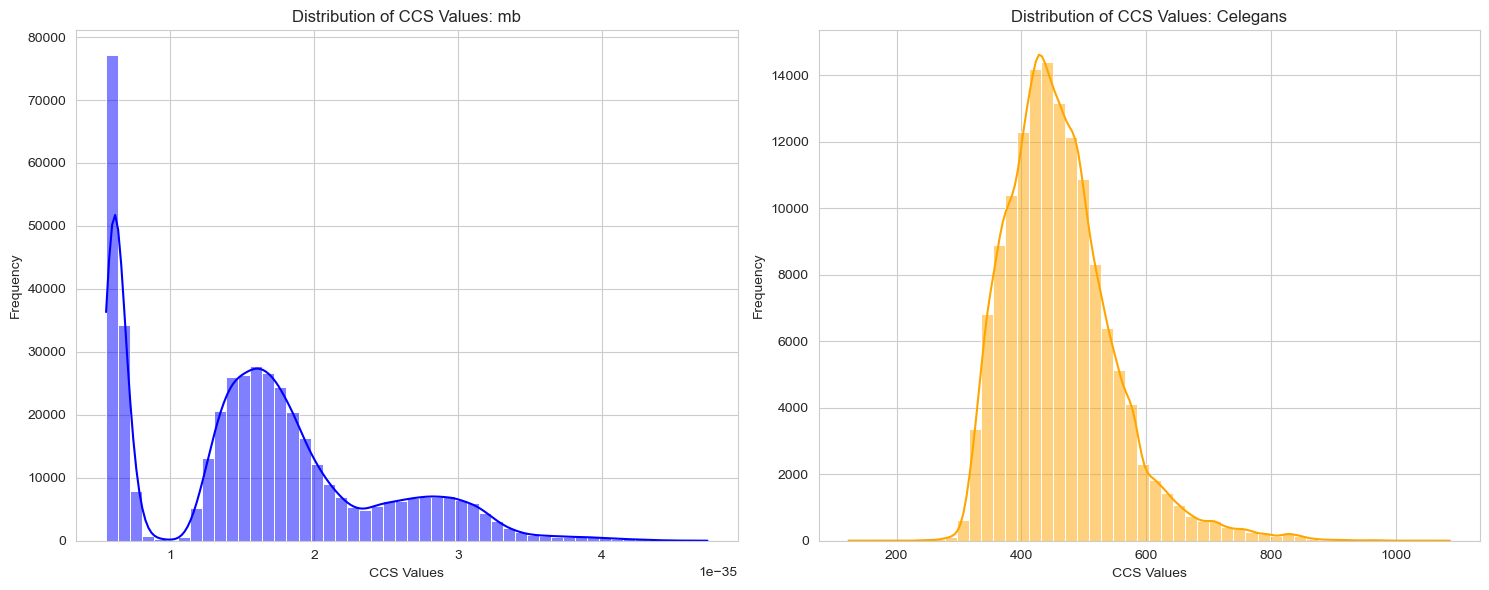

In [6]:
import seaborn as sns

# Load Celegans data
celegans_raw_data = pd.read_csv('../data/Celegans_evidence.txt', sep='\t')
celegans_data_frame = pd.DataFrame(celegans_raw_data)

# Assuming 'CCS' column is present in Celegans data
celegans_clean_frame = celegans_data_frame[['CCS']]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for mb_clean_frame
sns.histplot(mb_clean_frame['CCS'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of CCS Values: mb')
axes[0].set_xlabel('CCS Values')
axes[0].set_ylabel('Frequency')

# Plot histogram for Celegans data
sns.histplot(celegans_clean_frame['CCS'], bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of CCS Values: Celegans')
axes[1].set_xlabel('CCS Values')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


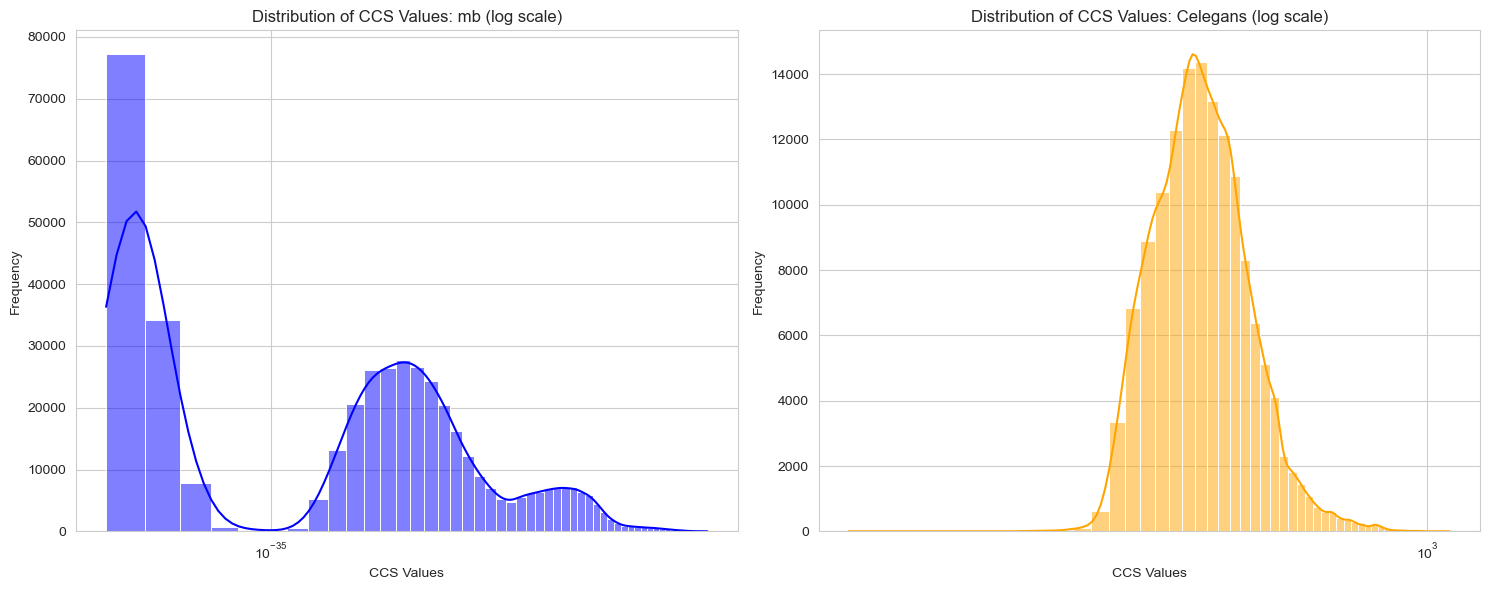

In [8]:
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for mb_clean_frame on a logarithmic scale
sns.histplot(mb_clean_frame['CCS'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of CCS Values: mb (log scale)')
axes[0].set_xlabel('CCS Values')
axes[0].set_ylabel('Frequency')
axes[0].set_xscale('log')

# Plot histogram for Celegans data on a logarithmic scale
sns.histplot(celegans_clean_frame['CCS'], bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of CCS Values: Celegans (log scale)')
axes[1].set_xlabel('CCS Values')
axes[1].set_ylabel('Frequency')
axes[1].set_xscale('log')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
